<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


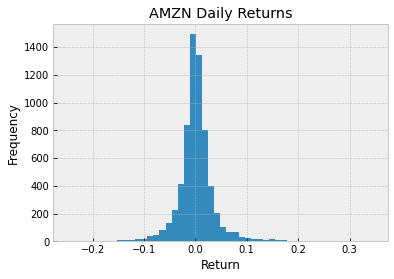

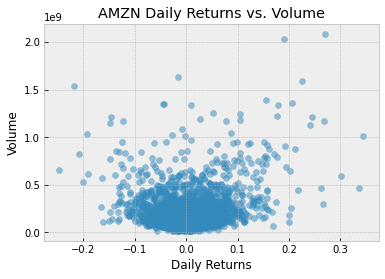

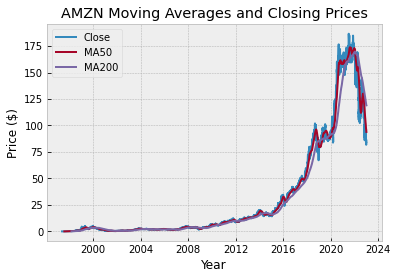

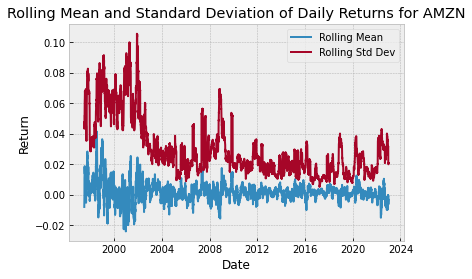

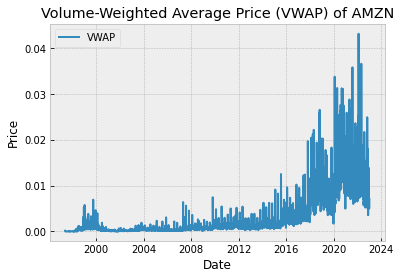

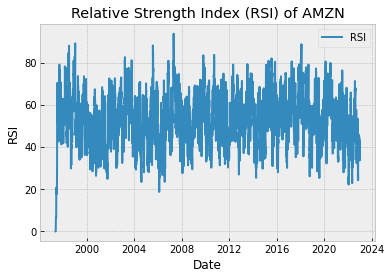

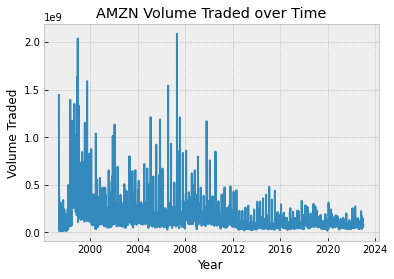

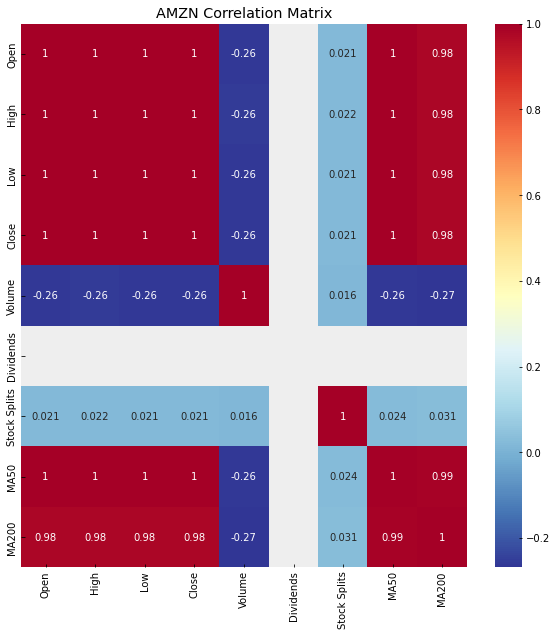

In [ ]:
# First, install yfinance if it is not already installed
!pip install yfinance
!pip install seaborn

# Now, let's import the necessary libraries
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.style.use("bmh")

# Next, we'll retrieve the stock data for AMZN
stock_data = yf.Ticker("AMZN").history(period="max")

# We can also plot the daily return distribution using a histogram
plt.hist(stock_data['Close'].pct_change(), bins=50)
plt.title('AMZN Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

# Finally, let's create a scatterplot of the daily returns
plt.scatter(stock_data['Close'].pct_change(), stock_data['Volume'], alpha=0.5)
plt.title('AMZN Daily Returns vs. Volume')
plt.xlabel('Daily Returns')
plt.ylabel('Volume')
plt.show()

# Calculate the 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Close'].rolling(50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(200).mean()

# Plot the closing price and moving averages
plt.plot(stock_data['Close'], label='Close')
plt.plot(stock_data['MA50'], label='MA50')
plt.plot(stock_data['MA200'], label='MA200')
plt.legend()
plt.title('AMZN Moving Averages and Closing Prices')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()

# Calculate and plot the rolling mean and standard deviation of the daily returns
rolling_mean = stock_data["Close"].pct_change().rolling(window=30).mean()
rolling_std = stock_data["Close"].pct_change().rolling(window=30).std()
plt.plot(stock_data.index, rolling_mean, label="Rolling Mean")
plt.plot(stock_data.index, rolling_std, label="Rolling Std Dev")
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Rolling Mean and Standard Deviation of Daily Returns for AMZN")
plt.legend()
plt.show()

# Calculate and plot the volume-weighted average price (VWAP)
vwap = stock_data["Close"] * stock_data["Volume"] / stock_data["Volume"].sum()
plt.plot(stock_data.index, vwap, label="VWAP")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Volume-Weighted Average Price (VWAP) of AMZN")
plt.legend()
plt.show()

# Calculate and plot the relative strength index (RSI)
delta = stock_data["Close"].diff()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
rs = up.ewm(com=14, adjust=False).mean() / down.abs().ewm(com=14, adjust=False).mean()
rsi = 100 - 100 / (1 + rs)
plt.plot(stock_data.index, rsi, label="RSI")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Relative Strength Index (RSI) of AMZN")
plt.legend()
plt.show()

# We can also plot the volume of stock traded over time
plt.plot(stock_data['Volume'])
plt.xlabel('Year')
plt.ylabel('Volume Traded')
plt.title('AMZN Volume Traded over Time')
plt.show()

# Calculate the correlation matrix
corr = stock_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.RdYlBu_r)
plt.title("AMZN Correlation Matrix")
plt.show()